# 已有DRL训练的数据，生成空间与时间异构性测试的数据

In [1]:
import numpy as np
import Rainfall_data as RD
import matplotlib.pyplot as plt

## RSH Rainfall
### rain in both east and west, P=1,3,5, A=21,28,35

In [2]:
p1,p2=[],[]
east_raindata,west_raindata=[],[]
delta,dura = 1,120

Pse=[1,1,3,3,5,5]
Psw=[3,3,3,3,3,3]
east_A=[30,30,30,50,50,50]
west_A=[30,30,30,30,30,30]
east_C=[1.18,1.18,1.16,1.16,1.01,1.15]
west_C=[1.15,1.15,1.02,1.02,1.08,0.94]
east_b=[18,18,18,18,21,16]
west_b=[18,18,19,19,19,17]
east_n=[0.91,0.91,0.89,0.89,0.9,0.86]
west_n=[0.87,0.87,0.92,0.92,0.91,0.87]
east_K=[0.2,0.3,0.4,0.6,0.7,0.8]
west_K=[0.8,0.7,0.6,0.4,0.3,0.2]

R=0.5

for i in range(6):
    #east
    A = east_A[i]
    C = east_C[i]#np.random.randint(93,120)/100
    P = Pse[i]
    b = east_b[i]#np.random.randint(16,22)
    n = east_n[i]#np.random.randint(86,96)/100
    r = east_K[i]#R
    tem1=[A,C,P,b,n,r]
    p1.append(tem1)
    para_tuple = (A,C,n,b,r,P,delta,dura)
    tem = RD.Chicago_icm(para_tuple)
    east_raindata.append(tem)
    
    #east
    A = west_A[i]
    C = west_C[i]#np.random.randint(93,120)/100
    P = Psw[i]
    b = west_b[i]#np.random.randint(16,22)
    n = west_n[i]#np.random.randint(86,96)/100
    r = west_K[i]#R
    tem2=[A,C,P,b,n,r]
    p2.append(tem2)
    para_tuple = (A,C,n,b,r,P,delta,dura)
    tem = RD.Chicago_icm(para_tuple)
    west_raindata.append(tem)

np.save('./RSH/east.npy',np.array(east_raindata))
#np.save('./RSH/west.npy',np.array(west_raindata))
np.save('./RSH/west.npy',np.array(west_raindata))
np.save('./RSH/Parameter_east.npy',np.array(p1))
np.save('./RSH/Parameter_west.npy',np.array(p2))

In [4]:
rainfile=[
    'E://Github/Text13_DRL_resilience/v4/DRL_GR_UDS/Step3_1_S1-S8/RSH/',
    'E://Github/Text13_DRL_resilience/v4/DRL_GR_UDS/Step4_RTC_DDQN/DDQN/test_rainfall/RSH/',
    'E://Github/Text13_DRL_resilience/v4/DRL_GR_UDS/Step4_RTC_DDQN_noGI/DDQN/test_rainfall/RSH/',
    'E://Github/Text13_DRL_resilience/v4/DRL_GR_UDS/Step4_RTC_PPO/PPO/test_rainfall/RSH/',
    'E://Github/Text13_DRL_resilience/v4/DRL_GR_UDS/Step4_RTC_PPO_noGI/PPO/test_rainfall/RSH/',
]

for f in rainfile:
    np.save(f+'east.npy',np.array(east_raindata))
    np.save(f+'west.npy',np.array(west_raindata))
    np.save(f+'Parameter_east.npy',np.array(p1))
    np.save(f+'Parameter_west.npy',np.array(p2))

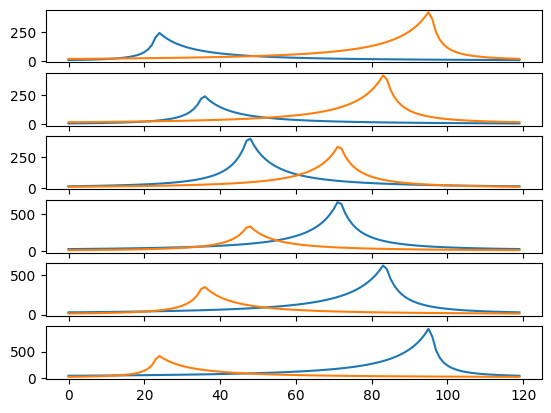

In [5]:
east_raindata = np.load('./RSH/east.npy').tolist()
west_raindata = np.load('./RSH/west.npy').tolist()

fig,ax=plt.subplots(6,1)
for i in range(6):
    tem1,tem2=[],[]
    for j in range(np.array(east_raindata[i]).shape[0]):
        tem1.append(float(np.array(east_raindata[i])[j,1]))
    for j in range(np.array(west_raindata[i]).shape[0]):
        tem2.append(float(np.array(west_raindata[i])[j,1]))
    ax[i].plot(tem1)
    ax[i].plot(tem2)

## RN Rainfall
### rain with milti top, number of top=2,3, P=1,5

In [7]:
p1,p2=[],[]
raindata=[]
delta,dura = 1,120

#top=2
P1=[1,5,5]
P2=[5,1,5]
r1=0.2
r2=0.8
A1=[20,30,30]
A2=[30,20,30]

for i in range(3):
    #first1
    A = A1[i]#np.random.randint(21,35)
    C = np.random.randint(93,120)/100
    P = P1[i]
    b = np.random.randint(16,22)
    n = np.random.randint(86,96)/100
    r = r1
    tem1=[A,C,P,b,n,r]
    p1.append(tem1)
    para_tuple1 = (A,C,n,b,r,P,delta,dura)
    #second
    A = A2[i]#np.random.randint(21,35)
    C = np.random.randint(93,120)/100
    P = P2[i]
    b = np.random.randint(16,22)
    n = np.random.randint(86,96)/100
    r = r2
    tem2=[A,C,P,b,n,r]
    p2.append(tem2)
    para_tuple2 = (A,C,n,b,r,P,delta,dura)
    
    tem = RD.Chicago_icm_multi([para_tuple1,para_tuple2])
    raindata.append(tem)

np.save('./RN/2top.npy',np.array(raindata))
np.save('./RN/Parameter_2top_1.npy',np.array(p1))
np.save('./RN/Parameter_2top_2.npy',np.array(p2))

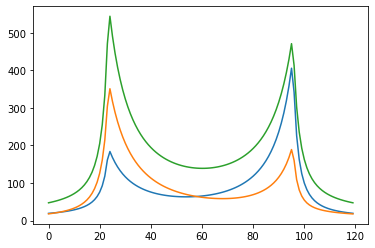

In [22]:
for i in range(3):
    tem=[]
    for j in range(np.array(raindata[i]).shape[0]):
        tem.append(float(np.array(raindata[i])[j,1]))
    plt.plot(tem)

In [25]:
p1,p2,p3=[],[],[]
raindata=[]
delta,dura = 1,120

#top=3
P1=[5,1,1,5,5,1]
P2=[1,5,1,5,1,5]
P3=[1,1,5,1,5,5]
r1=0.1
r2=0.5
r3=0.9
A1=[30,20,20,30,30,20]
A2=[20,30,20,30,20,30]
A3=[20,20,30,20,30,30]

for i in range(6):
    #first1
    A = A1[i]#np.random.randint(21,35)
    C = np.random.randint(93,120)/100
    P = P1[i]
    b = np.random.randint(16,22)
    n = np.random.randint(86,96)/100
    r = r1
    tem1=[A,C,P,b,n,r]
    p1.append(tem1)
    para_tuple1 = (A,C,n,b,r,P,delta,dura)
    #second
    A = A2[i]#np.random.randint(21,35)
    C = np.random.randint(93,120)/100
    P = P2[i]
    b = np.random.randint(16,22)
    n = np.random.randint(86,96)/100
    r = r2
    tem2=[A,C,P,b,n,r]
    p3.append(tem2)
    para_tuple2 = (A,C,n,b,r,P,delta,dura)
    #third
    A = A3[i]#np.random.randint(21,35)
    C = np.random.randint(93,120)/100
    P = P3[i]
    b = np.random.randint(16,22)
    n = np.random.randint(86,96)/100
    r = r3
    tem3=[A,C,P,b,n,r]
    p3.append(tem3)
    para_tuple3 = (A,C,n,b,r,P,delta,dura)
    
    tem = RD.Chicago_icm_multi([para_tuple1,para_tuple2,para_tuple3])
    raindata.append(tem)

np.save('./RN/3top.npy',np.array(raindata))
np.save('./RN/Parameter_3top_1.npy',np.array(p1))
np.save('./RN/Parameter_3top_2.npy',np.array(p2))
np.save('./RN/Parameter_3top_3.npy',np.array(p3))

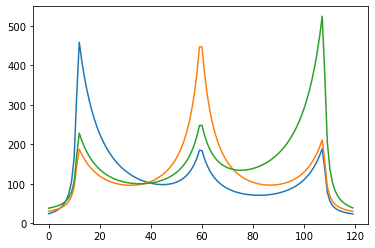

In [26]:
for i in range(3):
    tem=[]
    for j in range(np.array(raindata[i]).shape[0]):
        tem.append(float(np.array(raindata[i])[j,1]))
    plt.plot(tem)